## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape 

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].sum()/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('group == "treatment" and landing_page != "new_page"').count()[0] + df.query('group == "control" and landing_page == "new_page"').count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
rem_list_1 = df.query('group == "treatment" and landing_page != "new_page"').index
rem_list_2 = df.query('group == "control" and landing_page == "new_page"').index
df2 = df.drop(rem_list_1)
df2 = df2.drop(rem_list_2)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df_dup = df2[df2['user_id'].duplicated(keep=False)]
df_dup

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df_dup = df2[df2['user_id'].duplicated(keep=False)]
df_dup

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop(2893)

In [16]:
df_dup = df2[df2['user_id'].duplicated(keep=False)]
df_dup

,user_id,timestamp,group,landing_page,converted


In [17]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
prob_conv = df2.query('converted == 1').count()[0]/df2.shape[0]
prob_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
prob_cont_conv = df2.query('group == "control" and converted == 1').count()[0]/df2.query('group == "control"').count()[0]
prob_cont_conv                                                                                   
                                                                                   

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
prob_treat_conv = df2.query('group == "treatment" and converted == 1').count()[0]/df2.query('group == "treatment"').count()[0]
prob_treat_conv      

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
prob_new_page = df2.query('landing_page == "new_page"').count()[0]/df2['landing_page'].count()
prob_new_page

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

So far, it seems like the evidence is not sufficient to conclude that the new page leads to more conversions than the previous page. In contrast, it seems like the conversions are less on the old page rather than the new as the control group has the probability of 12,03% while the treatment group has a probability of 11,88%. 

However, we'd need to test the differences between the two groups subject to either a hypothesis- / A/B-testing to determine if there is a significant increase or not.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

**$p_{old}$**:
    The old page has the same amount or more conversions than the new page, or:
    
   **$p_{old}$ $>=$ $p_{new}$**

**$p_{new}$**:
    The old page does not have as many conversions as the new page, or:
     
   **$p_{old}$ $=<$ $p_{new}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
prob_pnew_conv = df2['converted'].mean()
prob_pnew_conv

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
prob_pold_conv = df2['converted'].mean()
prob_pold_conv

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.binomial(n_new, prob_pnew_conv)

In [28]:
new_page_converted

17423

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(n_old, prob_pold_conv)

In [30]:
old_page_converted

17576

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
(new_page_converted/n_new) - (old_page_converted/n_old)

-0.0010828949571429908

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs = []
for i in range(int(1e4)):
    new_page_converted = np.random.binomial(n_new, prob_pnew_conv)
    old_page_converted = np.random.binomial(n_old, prob_pold_conv)
    conv_diff = (new_page_converted/n_new)-(old_page_converted/n_old)
    p_diffs.append(conv_diff)


In [33]:
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.00039714, -0.0008209 ,  0.00206273, ...,  0.00065834,
        0.00281275, -0.00058694])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

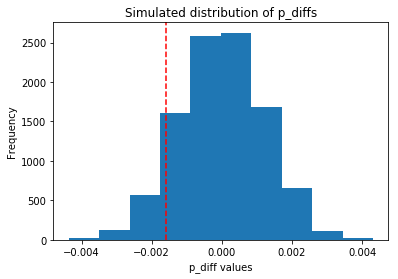

In [34]:
plt.hist(p_diffs)
plt.title('Simulated distribution of p_diffs')
plt.ylabel('Frequency')
plt.xlabel('p_diff values')
plt.axvline((prob_treat_conv-prob_cont_conv), c='r', ls='--');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
(p_diffs > (prob_treat_conv-prob_cont_conv)).mean()

0.90429999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
By looking at the difference of binomial distribution of the sample in the variable p_diffs and comparing it to the mean of the conversions for the control group, we are evaluating the p-number. The p-number is used to compare the results from our analysis and helps us determine if our results are significant. In this particular case as the p-value is above 5% we cannot reject the null hypothesis. Thus we can conclude that the new page isn't performing better than the old one.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

n_old, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [37]:
convert_both = np.array([convert_old, convert_new])
n_both = np.array([n_old, n_new])
z_stat, p_value = sm.stats.proportions_ztest(convert_both, n_both, alternative='smaller')
z_stat, p_value

(1.3109241984234394, 0.90505831275902449)

## n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [38]:
# Gaussian Percent Point Function
""" Searched for critical z-value and found:
https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/
where I got the following code that I could use to validate my z-score and p-value"""
from scipy.stats import norm
# define probability
p = 0.95
# retrieve value <= probability
value = norm.ppf(p)
print(value)
# confirm with cdf
z = norm.cdf(z_stat)
print(p)


1.64485362695
0.95


**Put your answer here.**

As the p-value is below 0.95, and the z-score is smaller than the z-score, we cannot reject the null hypothesis which is the same conclusion that we could derie from the results from j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
The model that would fit best would be logistic regression since the outcome is not continuous.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
df2['intercept'] = 1
df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
# As it seems summary() is getting outdated, here is a github post that solves the issue:
# https://github.com/statsmodels/statsmodels/issues/3931
# the first two rows in this box helps fix the issue to an error message that I got that stated:
# AttributeError: module 'scipy.stats' has no attribute 'chisqprob'

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

log = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        12:00:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

In the second part we wanted to see if **$p_{old}$ $=<$ $p_{new}$** and had a p-value smaller than 5% compared to the sampling distributuon, and thus being able to conclude if we could reject the null hypothesis or not, however we got a value of 0.91 instead. For this part, we are deducing the p-value by logistic regression and seeing if there is a statistical significance of the dependent variable based on it's influence from independent variables, thus seeing if the alternative hypothesis **$p_{old}$ $=<$ $p_{new}$** is true and if we can reject the null.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

The reason why we'd want to check more factors is due to the chance that the data we're analysing may be affected by other factors, and by checking them we can determine if other factors are coefficients and how they are in fact interacting with conversions. The details helps us to obtain a better understanding of the interactions in our dataset.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
df_countries = pd.read_csv('countries.csv')
df2_new = df2.set_index('user_id').join(df_countries.set_index('user_id'), how='inner')

In [43]:
df2_new.groupby('country').mean()

,converted,intercept,control,ab_page
country,,,,
CA,0.115318,1.0,0.496448,0.503552
UK,0.120594,1.0,0.501753,0.498247
US,0.119547,1.0,0.499541,0.500459


In [44]:
df2_new[['CA','UK','US']] = pd.get_dummies(df2_new['country'])
df2_new.head()

,timestamp,group,landing_page,converted,intercept,control,ab_page,country,CA,UK,US
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US,0,0,1


In [45]:
log_df2_new = sm.Logit(df2_new['converted'], df2_new[['intercept', 'CA', 'UK']])
res_new = log_df2_new.fit()
res_new.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Aug 2020   Pseudo R-squ.:               1.521e-05
Time:                        12:00:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [46]:
np.exp(res_new.params)

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

In [47]:
1/np.exp(res_new.params)

intercept    7.364925
CA           1.041647
UK           0.990133
dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
df2_new['UK_ab_page'] = df2_new['UK'] * df2_new['ab_page']
df2_new['CA_ab_page'] = df2_new['CA'] * df2_new['ab_page']
log_df2_new = sm.Logit(df2_new['converted'], df2_new[['intercept', 'UK_ab_page', 'CA_ab_page']])
res_new = log_df2_new.fit()
res_new.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Aug 2020   Pseudo R-squ.:               2.364e-05
Time:                        12:00:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
UK_ab_page     0.0149      0.017      0.862      0.389      -0.019       0.049
CA_ab_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
==============================================================================
"""

In [49]:
np.exp(res_new.params)

intercept     0.135840
UK_ab_page    1.015000
CA_ab_page    0.927579
dtype: float64

In [50]:
1/np.exp(res_new.params)

intercept     7.361591
UK_ab_page    0.985222
CA_ab_page    1.078076
dtype: float64

**Conclusions From Regressions Above:**

On the first country comparison on all different factors that we performed a logistic regression for, we cannot recognise a p-value below 0.05. Thus, we cannot reject the null hypothesis. On the second part however, there  is a p-value < 0.05 at 0.046 where the interaction of the ab_page and Canadian users have a small decrease in terms of conversions, which confirms previous conclosions of not only being unable to reject the null hypothesis but reaffirm that the conversion might be negatively impacting the use of the new page. However, as the coefficient is as small as 0.08, there is probably no practical significance from this finding.

**Final Conclusion:**

Due to the fact that we could not reject the null hypothesis in either the sampling distribution or in a logistic regression model, we have to assume that the old page is equally good or perhaps even better performing than the new page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0